<a href="https://colab.research.google.com/github/Sachinranasing/CM3604-Deep-Learning-Coursework/blob/main/Senti%20with%20BERT%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting the Drive to the Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%time df = pd.read_json("/content/drive/MyDrive/Copy of yelp_academic_dataset_review.json", encoding = 'ISO-8859-1', lines=True, nrows=20000)

CPU times: user 263 ms, sys: 77.6 ms, total: 341 ms
Wall time: 2.16 s


In [5]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [6]:
df.shape

(20000, 9)

In [7]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [8]:
df.stars.unique()
#How many unique star values are there
df.stars.value_counts()
#shows the distribution for each star value

5    8901
4    5130
3    2241
1    2157
2    1571
Name: stars, dtype: int64

### Visualization of the Distribution of the Star Ratings in te Dataset

Text(0.5, 1.0, 'Precentage of Stars rating')

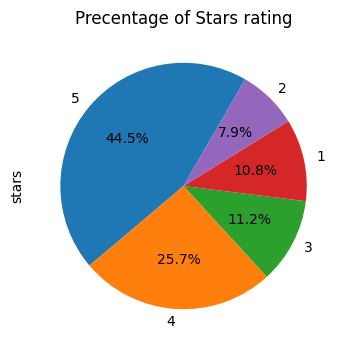

In [9]:
plt.figure(figsize=(4,4))
df["stars"].value_counts().plot.pie(autopct="%1.1f%%", startangle=60)
plt.title("Precentage of Stars rating")

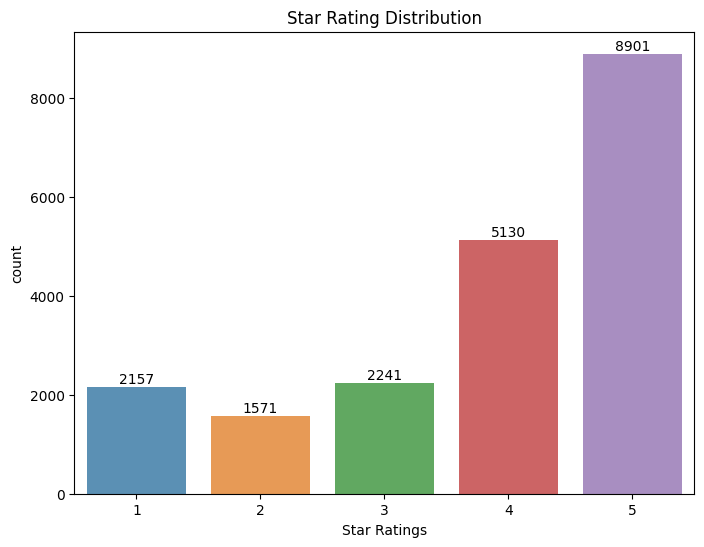

In [10]:
x=df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(8,6))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('count')
plt.xlabel('Star Ratings')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

Adding a new feature for the Dataset of Positive and Negetive Reviews according to the star ratings.

In [11]:
df["label"] = df["stars"].apply(lambda score: "positive" if score >= 3 else "negative")
df['label'] = df['label'].map({'positive':1, 'negative':0})

In [12]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,label
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1


In [13]:
new_df= df[['text', 'label']]

In [14]:
new_df.head()

,text,label
0,"If you decide to eat here, just be aware it is...",1
1,I've taken a lot of spin classes over the year...,1
2,Family diner. Had the buffet. Eclectic assortm...,1
3,"Wow! Yummy, different, delicious. Our favo...",1
4,Cute interior and owner (?) gave us tour of up...,1


In [15]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=4163da969b52d36a2db1407ac9d2e8928822c07ed88138895ab022d621664826
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [16]:
from langdetect import detect
#import detect function from langdetect
nonen=new_df[new_df['text'].apply(detect)!='en']
#nonen is the dataframe of non-english user reviews

In [17]:
nonen

,text,label
830,"De vacaciones y sin ganas de cocinar, decidimo...",1
1906,City Parkã®è¿ãã«ããæ¿å®ããæ°·å±ã...,1
2112,Ok beer. Ok food. We like breweries because we...,1
2577,Wonderful!!!!!! Best place I have ever been...,1
3369,Op suggestie van yelp- hier geweest op onze ee...,1
3747,"Yum yum yum! Salads, pizza and sushi are all g...",1
4281,Excelente comida mediterrÃ¡nea! El gyro es bue...,1
5717,Peter piper on roids. Good pizza,1
7748,Small quiet little place but didn't feel cramp...,1
8623,Sehr nettes kleines ruhiges typisches amerikan...,1


In [18]:
yelp=new_df[new_df['text'].apply(detect)=='en']
#yelp is the data frame we will continue to work on.
#yelp only contains English reviews

In [19]:
yelp

,text,label
0,"If you decide to eat here, just be aware it is...",1
1,I've taken a lot of spin classes over the year...,1
2,Family diner. Had the buffet. Eclectic assortm...,1
3,"Wow! Yummy, different, delicious. Our favo...",1
4,Cute interior and owner (?) gave us tour of up...,1
...,...,...
19995,Manager is a complete asshole. If you have a ...,0
19996,"If you're looking for Bingo around St Louis, t...",1
19997,Unfortunately we had a bad experience here...w...,0
19998,Meh. This pizza was basically a deep-dish grea...,0


In [20]:
yelp['text']=yelp['text'].str.lower()
#change all strings to be lower
yelp['text']=yelp['text'].str.replace('[^\w\s]','')
#get rid of unwanted characters such as punctuation marks
yelp['text']=yelp['text'].str.replace('\d+','')
#removing numerals
yelp['text']=yelp['text'].str.replace('\n',' ').str.replace('\r','')

<ipython-input-20-7e17cbb29105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.lower()
<ipython-input-20-7e17cbb29105>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  yelp['text']=yelp['text'].str.replace('[^\w\s]','')
<ipython-input-20-7e17cbb29105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['text']=yelp['text'].str.replace('[^\w\s]','')
<ipython-input-20-7e17cbb29105>:5: FutureWarning: The default value of regex 

In [21]:
yelp

,text,label
0,if you decide to eat here just be aware it is ...,1
1,ive taken a lot of spin classes over the years...,1
2,family diner had the buffet eclectic assortmen...,1
3,wow yummy different delicious our favorite...,1
4,cute interior and owner gave us tour of upcom...,1
...,...,...
19995,manager is a complete asshole if you have a b...,0
19996,if youre looking for bingo around st louis thi...,1
19997,unfortunately we had a bad experience herewe a...,0
19998,meh this pizza was basically a deepdish grease...,0


In [22]:
yelp.label.value_counts()

1    16254
0     3726
Name: label, dtype: int64